In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import general
from helper import pca

[[ 3.38156267  3.38911268]
 [ 4.52787538  5.8541781 ]
 [ 2.65568187  4.41199472]]


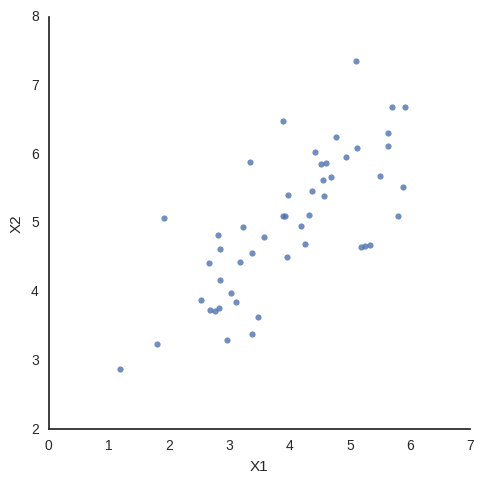

In [2]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat.get('X')

# visualize raw data
print(X[:3])

sns.lmplot('X1', 'X2', 
           data=pd.DataFrame(X, columns=['X1', 'X2']),
           fit_reg=False)

# normalize data

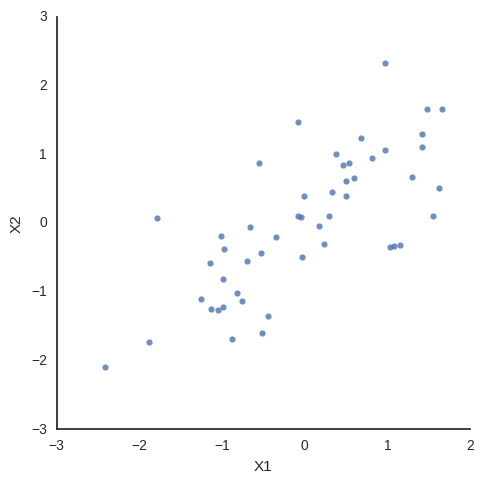

In [3]:
X_norm = pca.normalize(X)

sns.lmplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False)

# covariance matrix $\Sigma$
<img style="float: left;" src="../img/cov_mat.png">

In [4]:
Sigma = pca.covariance_matrix(X_norm)  # capital greek Sigma
Sigma  # (n, n)

array([[ 1.        ,  0.73553038],
       [ 0.73553038,  1.        ]])

# PCA
http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

In [5]:
U, S, V = pca.pca(X_norm)

In [6]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [7]:
u1 = U[0]
u1

array([-0.70710678, -0.70710678])

# project data to lower dimension

In [10]:
# show top 10 projected data
Z = pca.project_data(X_norm, U, 1)
Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

http://stackoverflow.com/a/23973562/3943702

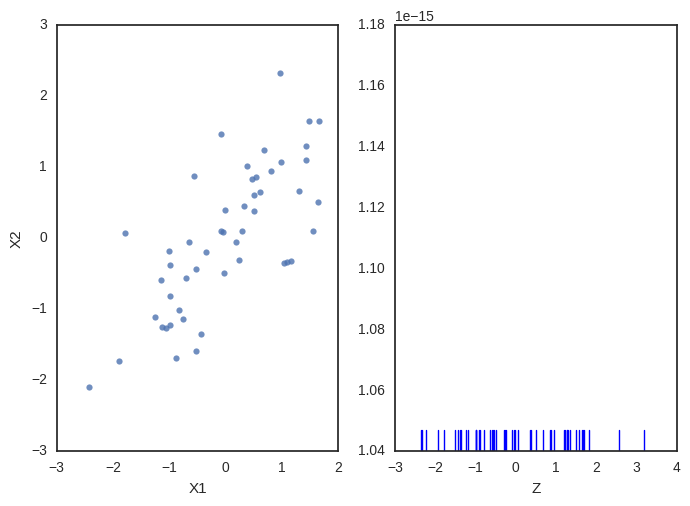

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)

sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')

# recover data to original dimension
You see, there is inevitable information loss from lower to higher dimension

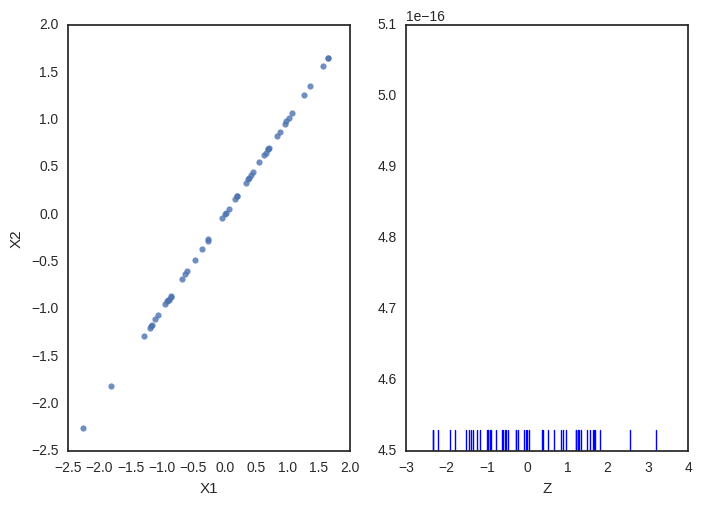

In [28]:
X_recover = pca.recover_data(Z, U)

fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_recover, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)

sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')

### the projection from `(X1, X2)` to `Z` could be visualized like this

<img style="float: central;" src="../img/pca_projection.png">